<a href="https://colab.research.google.com/github/Epsita-R/LLM/blob/main/Epsita_517_CIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION 1**

Implement Positional Encoding (Sinusoidal Embedding with Cosine and
Sine) with visualization of Dimensionality 1, 128 and 512.

In NLP,  the order of words is crucial for understanding the meaning of sentences. To ensure that the transformers function effectively by understanding the importance of order of words we use positional encoding.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Defining the Positional Encoding Function

In [56]:
def get_positional_encoding(seq_len, d_model):
    PE = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** ((2 * i) / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((2 * (i + 1)) / d_model)))
    return PE

Vizualization

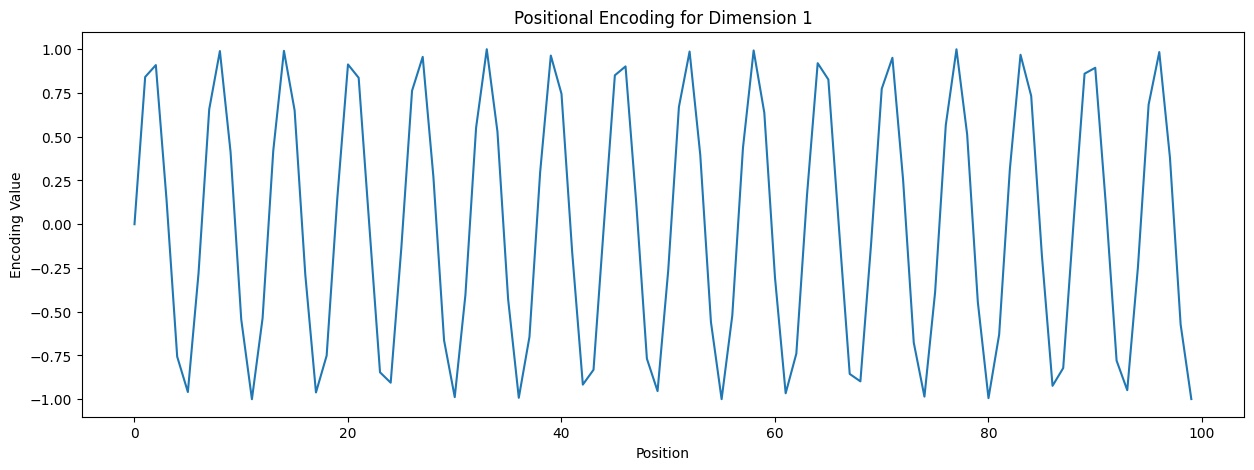

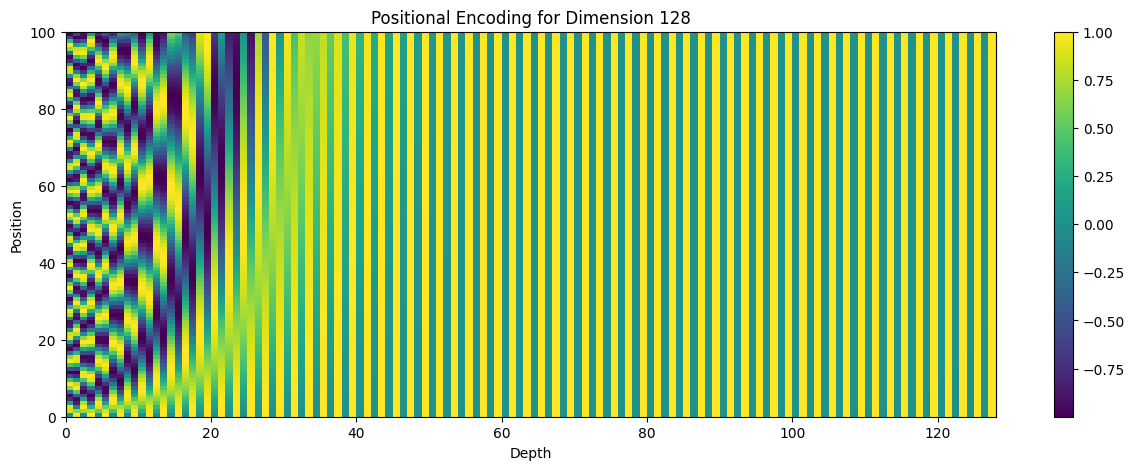

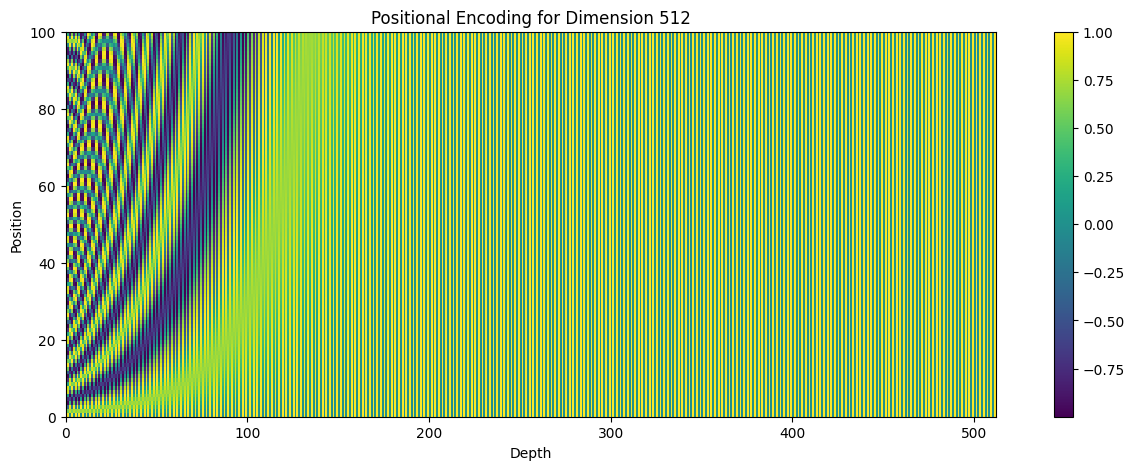

In [58]:
def plot_positional_encoding(d_model, seq_len=100):
    PE = get_positional_encoding(seq_len, d_model)
    plt.figure(figsize=(15, 5))
    if d_model == 1:
        plt.plot(PE[:, 0])
        plt.title(f'Positional Encoding for Dimension {d_model}')
        plt.xlabel('Position')
        plt.ylabel('Encoding Value')
    else:
        plt.pcolormesh(PE, cmap='viridis')
        plt.title(f'Positional Encoding for Dimension {d_model}')
        plt.xlabel('Depth')
        plt.ylabel('Position')
        plt.colorbar() # Only add colorbar for pcolormesh plots
    plt.show()

plot_positional_encoding(1)
plot_positional_encoding(128)
plot_positional_encoding(512)

**QUESTION 2**

Implement Natural Language Generation (Any one of these category -
Question Answering /Poem Creation/Story Writing/ Reading
Comprehension/ Information Retrieval) using any transformer-based
Foundation models

**Question Answering**

In [44]:
!pip install python-dotenv
!pip install langchain
!pip install langchain-groq

In [45]:
from dotenv import load_dotenv
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_groq import ChatGroq
import os

In [46]:
load_dotenv()

# Retrieve the API key from the environment variable
api_key = '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'
# Print the API key to ensure it is loaded correctly
print(api_key)

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


In [47]:
model = ChatGroq(api_key = api_key,model_name = 'gemma-7b-it')

In [48]:
parser = StrOutputParser()
chain = model | parser
chain.invoke('what is a dog')

'**A dog is a domesticated member of the Canidae family, known for their loyalty, companionship, and working abilities.**\n\n**Characteristics:**\n\n* Medium to large-sized mammals\n* Short to long coats in various colors and patterns\n* Bushy tails and erect ears\n* Powerful jaws and sharp teeth (although domestic dogs have lost their ancestral hunting instincts)\n* Pack animals, but highly social and affectionate towards humans\n\n**Origins:**\n\n* Dogs evolved from wolves through selective breeding by early humans.\n* Their domestication process began around 15,000-30,000 years ago.\n* Different breeds emerged over centuries, each with unique characteristics and temperaments.\n\n**Temperament and Behavior:**\n\n* Highly intelligent and trainable\n* Loyal and affectionate companions\n* Protective and alert\n* Strong social animals, but can also be independent\n* Known for their keen sense of smell and hearing\n\n**Uses:**\n\nDogs have a wide range of uses, including:\n\n* **Working d

In [49]:
template = (
    """
    you're question answering expert
answer : {answer}
"""
)
prompt = PromptTemplate.from_template(template=template)
chain =  prompt | model | parser

In [51]:
answer = """
tell me about Earth
"""
result = chain.invoke({'answer':answer})
print(result)

## Earth: Our Home Planet

**Earth** is the third planet from the Sun in our solar system. It is the only planet in our solar system known to harbor life.

**Physical Characteristics:**

* Earth is a terrestrial planet, meaning it is made up of land, water, and atmosphere.
* It is the only planet with a magnetic field, which protects it from the harmful radiation of the Sun.
* Its surface is covered in land, oceans, mountains, volcanoes, and deserts.
* The average temperature on Earth is 15°C (59°F).

**Composition:**

* Earth is composed of 71% water, 29% land, and 0.02% other materials.
* The solid land is further composed of 47% rock and minerals, 28% sediment, and 25% soil.

**Atmosphere:**

* Earth's atmosphere is composed of 78% nitrogen, 21% oxygen, and 1% other gases.
* The atmosphere protects life on Earth by filtering out harmful UV rays from the Sun, regulating temperature, and providing the oxygen we breathe.

**History and Evolution:**

* Earth formed approximately 4.54 bi

**Story Writing**

In [52]:
!pip install transformers

In [53]:
# Import Libraries and Load the Model
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [55]:
# Function to generate story
def generate_story(prompt, max_length=200, num_return_sequences=1):
    # Encode the input text
    input_ids = tokenizer.encode(prompt, return_tensors='pt')

    # Generate the story
    output = model.generate(
        input_ids,
        max_length=max_length,
        num_return_sequences=num_return_sequences,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        temperature=0.7,
        do_sample=True,
        early_stopping=True
    )

    # Decode and print the story
    story = tokenizer.decode(output[0], skip_special_tokens=True)
    return story

# Prompt for the story
prompt = "Hi, I am a tourist in Bangalore"

# Generate and print the story
story = generate_story(prompt)
print(story)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Hi, I am a tourist in Bangalore. We are all here for the first time."

The couple's first visit to Bangalore was to the capital when they were travelling for work. "My husband and I went to a city in India that was one of the few places where there was a lot of tourism," said Mr Singh, who is a student at the University of Hyderabad.
 and also an editor at Bangalore-based Express Tribune
. The couple had been planning a wedding with their three daughters, and planned to visit a temple and a river in Kolkata. They met in a bar in Ahmedabad on Friday, after which they had a brief chat. It was then that they decided to spend the day on the banks of Kudum.
